In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [50]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


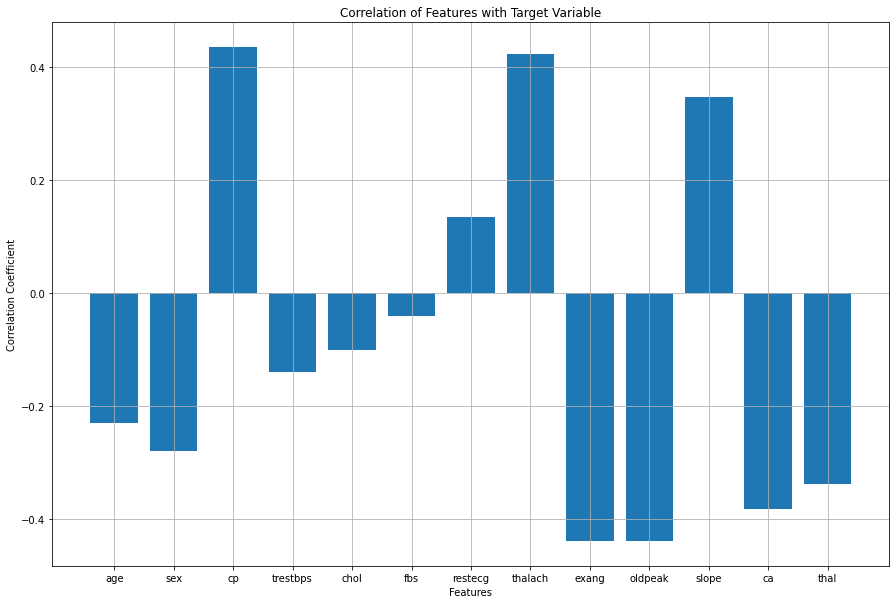

In [54]:

# Calculate the correlation matrix
correlation_matrix = df.corr()
# Extract the correlation coefficients of the target variable
target_correlation = correlation_matrix['target']
# Remove the correlation of the target variable with itself
target_correlation = target_correlation.drop('target')

# Create a bar plot
plt.figure(figsize=(15, 10))
plt.bar(target_correlation.index, target_correlation.values)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation of Features with Target Variable')
plt.grid(True)
plt.show()


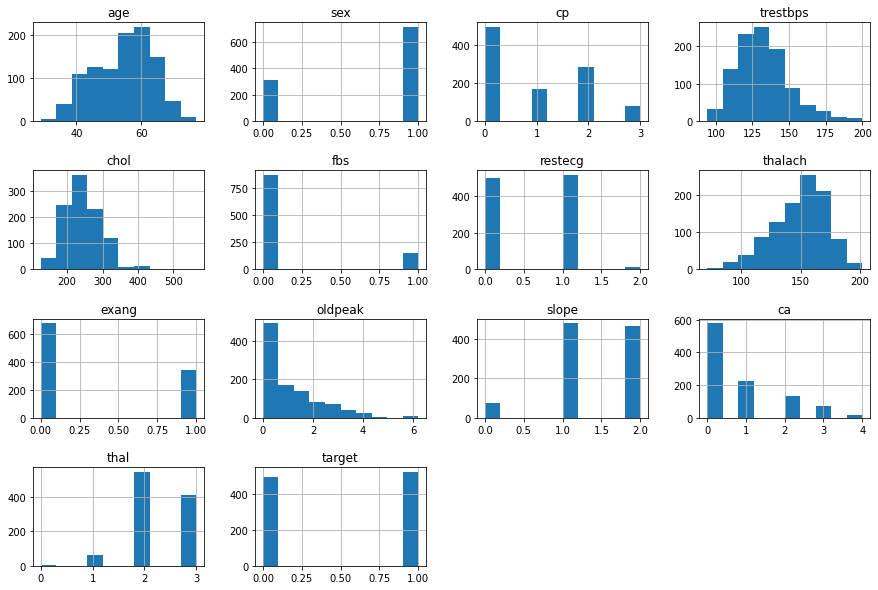

In [55]:
# plot histogram
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()


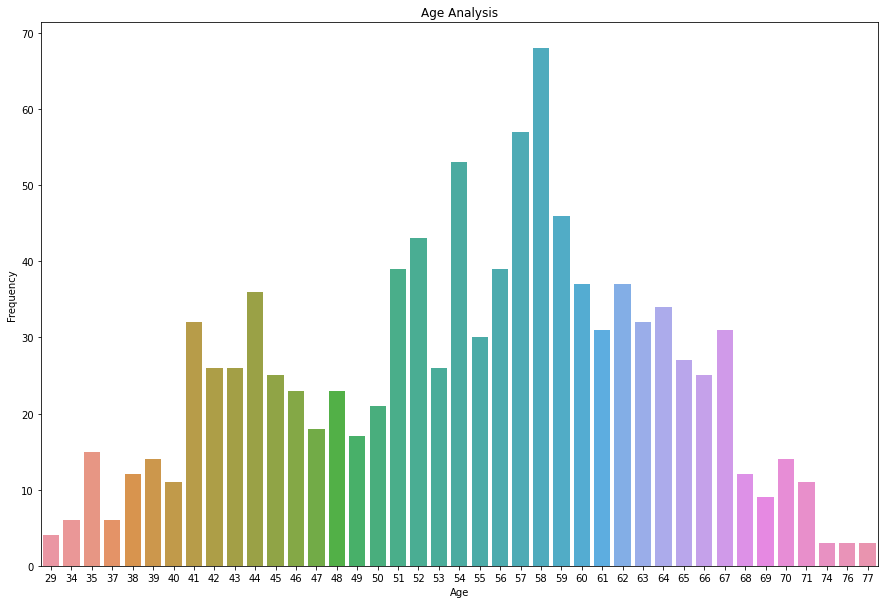

In [56]:
# Age analysis
plt.figure(figsize=(15, 10))
sns.barplot(x=df.age.value_counts().index, y=df.age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Analysis')
plt.show()

In the Age analysis, we can see that people of age 58 have the highest frequency. Here, we can even see that the elderly people are the ones most affected as compared to the younger ones.

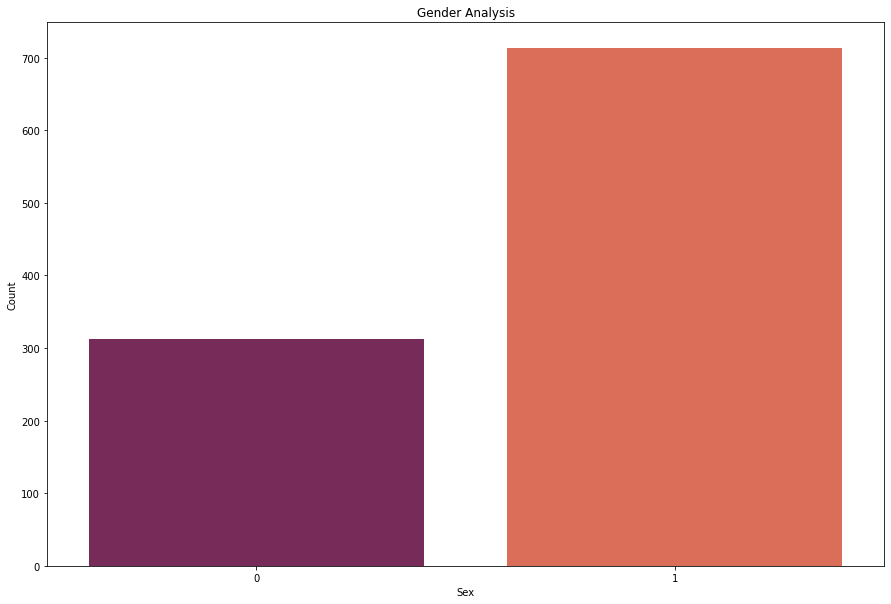

In [57]:
# Gender analysis
plt.figure(figsize=(15, 10))
sns.barplot(x=df.sex.value_counts().index,y=df.sex.value_counts().values,palette='rocket')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Analysis')
plt.show()

In Gender Analysis, we can figure that the number of males are double when compared to females.

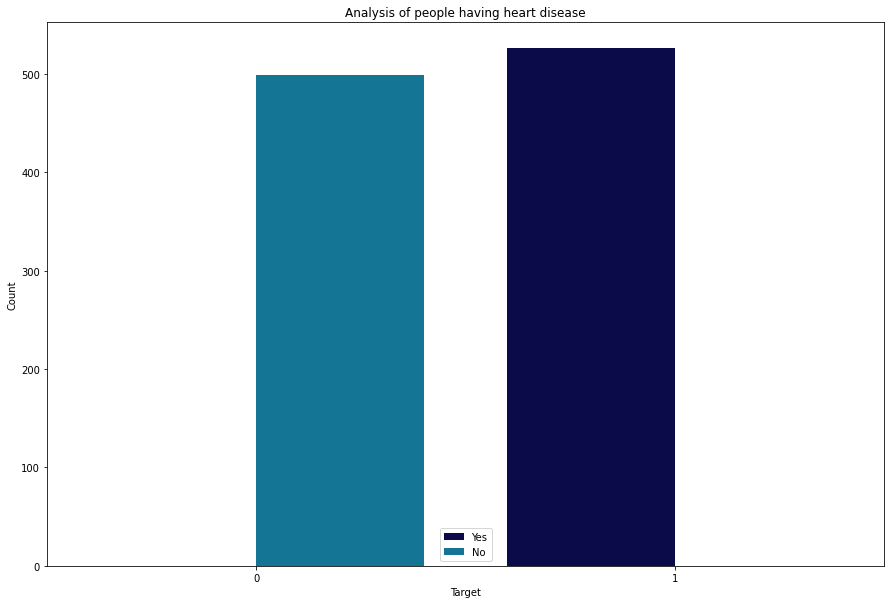

In [58]:
# Analysis of people having heart disease
plt.figure(figsize=(15, 10))
sns.barplot(x=df.target.value_counts().index,y=df.target.value_counts().values, hue=['Yes', 'No'], palette='ocean')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Analysis of people having heart disease')
plt.show()

Here 0 stands for people not having heart disease and 1 stands for people with heart disease.

In [59]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [60]:
data = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
data[columns_to_scale]=sc.fit_transform(data[columns_to_scale])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
y = data['target']
X = data.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I will now analyse the accuracy of the various different models to predict heart disease.

In [65]:
pip install xgboost


   ---------------------------------------- 99.7/99.7 MB 6.1 MB/s eta 0:00:00


In [67]:
pip install catboost

     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 101.0/101.0 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 15.6/15.6 MB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [79]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

print("Accuracy Scores of Different Models: ")
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Accuracy Scores of Different Models: 
Neural Network : 0.9853658536585366
LogisticRegression : 0.8195121951219512
ExtraTreesClassifier : 0.9853658536585366
DecisionTree : 0.9853658536585366
RandomForest : 0.9853658536585366
Naive Bayes : 0.7658536585365854
KNeighbours : 0.8
SVM : 0.8829268292682927
GradientBoostingClassifier:  0.9414634146341463
XGB : 0.9853658536585366
CatBoost : 0.9853658536585366


In [80]:
clf1 = CatBoostClassifier()
clf2 = MLPClassifier(max_iter = 1000)
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()
clf5 = ExtraTreesClassifier()
clf6 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('CatBoost', clf1), ('MLP', clf2), ('Decision Tree', clf3), ('Random Forest', clf4), ('Extra Trees', clf5), ('XGB', clf6) ], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))



Learning rate set to 0.009465
0:	learn: 0.6833349	total: 46.9ms	remaining: 46.9s
1:	learn: 0.6728449	total: 62.4ms	remaining: 31.1s
2:	learn: 0.6635777	total: 67.3ms	remaining: 22.4s
3:	learn: 0.6541690	total: 71.2ms	remaining: 17.7s
4:	learn: 0.6444171	total: 74.1ms	remaining: 14.8s
5:	learn: 0.6338433	total: 78.5ms	remaining: 13s
6:	learn: 0.6255898	total: 82.5ms	remaining: 11.7s
7:	learn: 0.6198235	total: 85ms	remaining: 10.5s
8:	learn: 0.6127451	total: 88.5ms	remaining: 9.75s
9:	learn: 0.6053925	total: 91.2ms	remaining: 9.03s
10:	learn: 0.5965471	total: 95.2ms	remaining: 8.55s
11:	learn: 0.5909336	total: 99.1ms	remaining: 8.16s
12:	learn: 0.5843622	total: 102ms	remaining: 7.77s
13:	learn: 0.5750406	total: 105ms	remaining: 7.4s
14:	learn: 0.5681993	total: 109ms	remaining: 7.14s
15:	learn: 0.5613658	total: 112ms	remaining: 6.9s
16:	learn: 0.5546130	total: 115ms	remaining: 6.64s
17:	learn: 0.5495163	total: 117ms	remaining: 6.38s
18:	learn: 0.5433113	total: 120ms	remaining: 6.18s
19:	l

In [81]:
print(confusion_matrix(y_test, predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : {:.4f}".format(accuracy))

[[102   0]
 [  3 100]]
Accuracy : 0.9854


In [83]:
# Precision, Recall and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Precision : {:.4f}".format(precision))
print("Recall : {:.4f}".format(recall))
print("F1 Score : {:.4f}".format(f1))


Precision : 1.0000
Recall : 0.9709
F1 Score : 0.9852
